TensorFlow version: 2.12.1
Keras version: 2.12.0
Dataset dimensions: (1599, 12)
Null values in dataset:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
no categorical variables except target
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                768       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                               

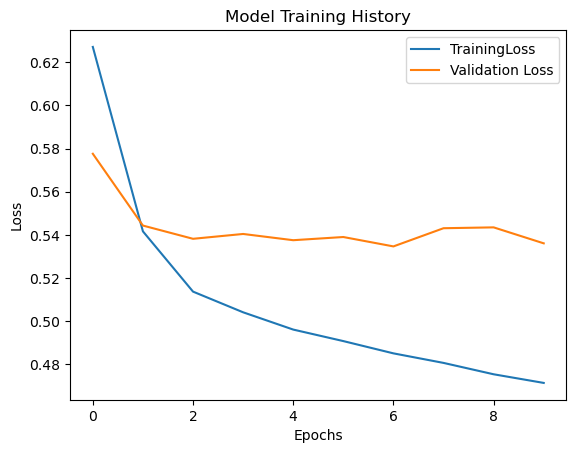

10/10 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy: 0.7344
Test Loss: 0.5063635110855103
Test Accuracy: 0.734375


In [30]:
# Q1
import tensorflow as tf
from tensorflow import keras
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

# Q2
import pandas as pd

# Load the Wine Quality dataset
wine_data = pd.read_csv('wine.csv')

# Explore dataset dimensions
print("Dataset dimensions:", wine_data.shape)

# Q3
# Check for null values
print("Null values in dataset:\n", wine_data.isnull().sum())

# Identify categorical variables
categorical_vars = [i for i in wine_data.columns if (wine_data[i].dtype=='O') & (i not in 'quality')]
print('no categorical variables except target')


# Q4
# Separate features and target variables
X = wine_data_encoded.drop('quality', axis=1)
y = wine_data_encoded['quality']

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Q5
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Q6
from sklearn.preprocessing import StandardScaler

# Perform scaling on the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
#X_test_scaled = scaler.transform(X_test)

# Q7 and Q8
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Q9
from tensorflow.keras.callbacks import TensorBoard

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Q10
from tensorflow.keras.callbacks import EarlyStopping

# Create an EarlyStopping callback
early_stopping_callback = EarlyStopping(patience=3)

# Q11
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min')

# Q12
# Print the model summary
model.summary()

# Q13 and Q14
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Q15
# Fit the model to the data
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=20, batch_size=32, callbacks=[tensorboard_callback, early_stopping_callback, checkpoint_callback])

# Q16
# Get the model's parameters
model_params = model.count_params()
print("Model parameters:", model_params)

# Q17
# Store the model's training history as a Pandas DataFrame
history_df = pd.DataFrame(history.history)

# Q18
import matplotlib.pyplot as plt

# Plot the model's training history
plt.plot(history_df['loss'], label='TrainingLoss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Q19
# Evaluate the model's performance using the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
